![](http://www.quickmeme.com/img/8d/8da6189f6c24b2f66498daccefdba903f70e45b1fc4e305d52848c5942e1c066.jpg)

## Taking a deep dive in NLP techniques with the famous Kaggle competition Quora Insincere Questions Classification problem. 

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

['test.csv', 'train.csv', 'sample_submission.csv', 'embeddings']


In [2]:
df_train = pd.read_csv("../input/train.csv",index_col='qid')
df_test = pd.read_csv("../input/test.csv",index_col='qid')
#df = pd.concat([df_train ,df_test],sort=True)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306122 entries, 00002165364db923c7e6 to ffffed09fedb5088744a
Data columns (total 2 columns):
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(1)
memory usage: 29.9+ MB


# Business Problem

## Business problem asks us to classify question texts given to us with the help of the target variable in the training dataset. Given the involvement of text data, it requires to be treated with NLP techniques to be able to extract useful information from text data.

In [5]:
df_train.head()

,question_text,target
qid,,
00002165364db923c7e6,How did Quebec nationalists see their province...,0
000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
df_train.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64

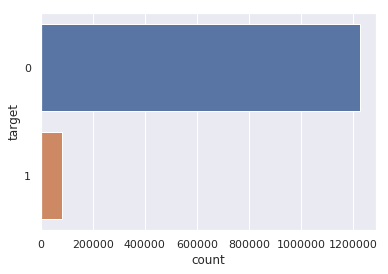

In [32]:
p = sns.countplot(x=None,y= 'target',data=df_train)

![](https://cdn-images-1.medium.com/max/1200/0*dIUk8mZ4ADIqBjUj.jpg)

In [6]:
df_train.dropna(inplace=True)

# Time for some NLP

# Bag of Words
 The bag-of-words model is simple to understand and implement. It is a way of extracting features from the text for use in machine learning algorithms.In this approach, we use the tokenized words for each observation and find out the frequency of each token.
Let’s take an example to understand this concept in depth.

* “It was the best of times”
* “It was the worst of times”
* “It was the age of wisdom”
* “It was the age of foolishness”

We treat each sentence as a separate document and we make a list of all words from all the four documents excluding the punctuation. We get,

‘It’,  ‘was’,  ‘the’,  ‘best’,  ‘of’,  ‘times’,  ‘worst’,  ‘age’,  ‘wisdom’,  ‘foolishness’

The next step is the create vectors. Vectors convert text that can be used by the machine learning algorithm.

We take the first document — “It was the best of times” and we check the frequency of words from the 10 unique words.
* “it” = 1
* “was” = 1
* “the” = 1
* “best” = 1
* “of” = 1
* “times” = 1
* “worst” = 0
* “age” = 0
* “wisdom” = 0
* “foolishness” = 0

#### Rest of the documents will be:
* “It was the best of times” = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
* “It was the worst of times” = [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]
* “It was the age of wisdom” = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]
* “It was the age of foolishness” = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]

#### In this approach, each word or token is called a “gram”. Creating a vocabulary of two-word pairs is called a bigram model.

For example, the bigrams in the first document : “It was the best of times” are as follows:
* “it was”
* “was the”
* “the best”
* “best of”
* “of times”

# Vectorization

#### The process of converting NLP text into numbers is called vectorization in ML. Different ways to convert text into vectors are:

* Counting the number of times each word appears in a document.
* Calculating the frequency that each word appears in a document out of all the words in the document.

## 1. CountVectorizer
CountVectorizer works on Terms Frequency, i.e. counting the occurrences of tokens and building a sparse matrix of documents x tokens.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

## 2. TF-IDF Vectorizer
TF-IDF stands for term frequency-inverse document frequency. TF-IDF weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

**Term Frequency (TF)**: is a scoring of the frequency of the word in the current document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. The term frequency is often divided by the document length to normalize.

![](https://cdn-images-1.medium.com/max/800/1*SUAeubfQGK_w0XZWQW6V1Q.png)

**Inverse Document Frequency** (IDF): is a scoring of how rare the word is across documents. IDF is a measure of how rare a term is. Rarer the term, more is the IDF score.


![](https://cdn-images-1.medium.com/max/800/1*T57j-UDzXizqG40FUfmkLw.png)
Thus,

![](https://cdn-images-1.medium.com/max/800/1*YrgmAeG7KNRB4dQcGcsdyg.png)

# Implementation

#### Below is a pipeline based LGBM Classifier implementation of the above NLP concept Bag of Words on the Quora business problem.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgbm


text_clf_lgbm = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', lgbm.LGBMClassifier()),
])


In [9]:
from sklearn.model_selection import train_test_split

X = df_train['question_text']
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [10]:
text_clf_lgbm.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lgbm.predict(X_test)

[[400644   3710]
 [ 17155   9512]]


# Evaluation


![](http://www.quickmeme.com/img/30/300ace809c3c2dca48f2f55ca39cbab24693a9bd470867d2eb4e869c645acd42.jpg)

Text(0.5, 12.5, 'Predicted label')

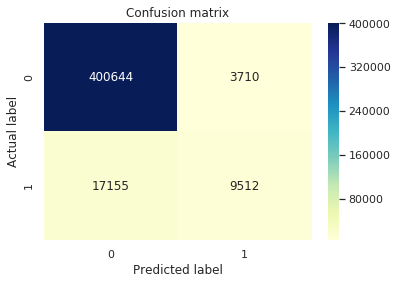

In [21]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9515916857879314


In [24]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    404354
           1       0.72      0.36      0.48     26667

   micro avg       0.95      0.95      0.95    431021
   macro avg       0.84      0.67      0.73    431021
weighted avg       0.94      0.95      0.94    431021



# Submission

In [27]:
df_test['prediction'] = text_clf_lgbm.predict(df_test['question_text'])
df_test.head()

,question_text,prediction
qid,,
0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,1
00002bd4fb5d505b9161,When should I apply for RV college of engineer...,0
00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,0
000086e4b7e1c7146103,Who are entrepreneurs?,0
0000c4c3fbe8785a3090,Is education really making good people nowadays?,0


In [28]:
df_test.drop(['question_text'],axis=1,inplace=True)
df_test.to_csv('submission.csv',index=True)

In [30]:
df_test.head()

,prediction
qid,
0000163e3ea7c7a74cd7,1
00002bd4fb5d505b9161,0
00007756b4a147d2b0b3,0
000086e4b7e1c7146103,0
0000c4c3fbe8785a3090,0


A Big Thanks to:

* https://medium.com/greyatom/an-introduction-to-bag-of-words-in-nlp-ac967d43b428
* https://medium.com/@paritosh_30025/natural-language-processing-text-data-vectorization-af2520529cf7



![](https://www.humorside.com/wp-content/uploads/2017/12/thank-you-meme-01.jpg)
